In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import numpy as np
from matplotlib import colormaps
import torchvision
import os

import utils
from datasets import CocoLoader,get_coco_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# CUDA tests
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # might not be viable, check again!

print("CUDA available:" + str(torch.cuda.is_available()))
from torch.utils.cpp_extension import CUDA_HOME

print("CUDA_HOME:" + str(CUDA_HOME))
torch.device("cuda" if torch.cuda.is_available() else "cpu")

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
print(available_gpus)
print(torch.cuda.device_count())

CUDA available:True
CUDA_HOME:/home.stud/svobo114/.conda/envs/detect_env_clone
1


# COCO testing

In [10]:
transforms = None
data_train = CocoLoader(get_coco_split(split="val"), transform=transforms)

TypeError: super(type, obj): obj must be an instance or subtype of type

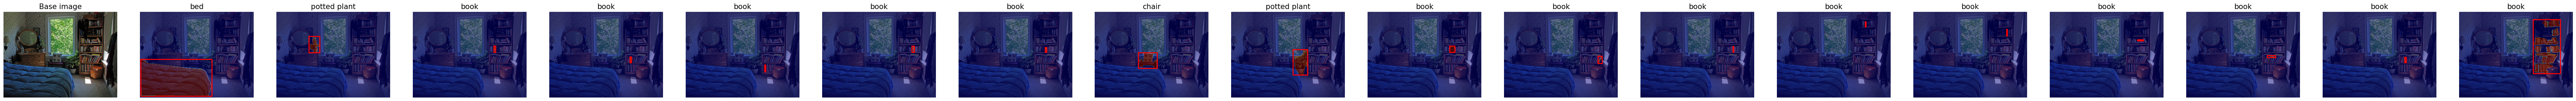

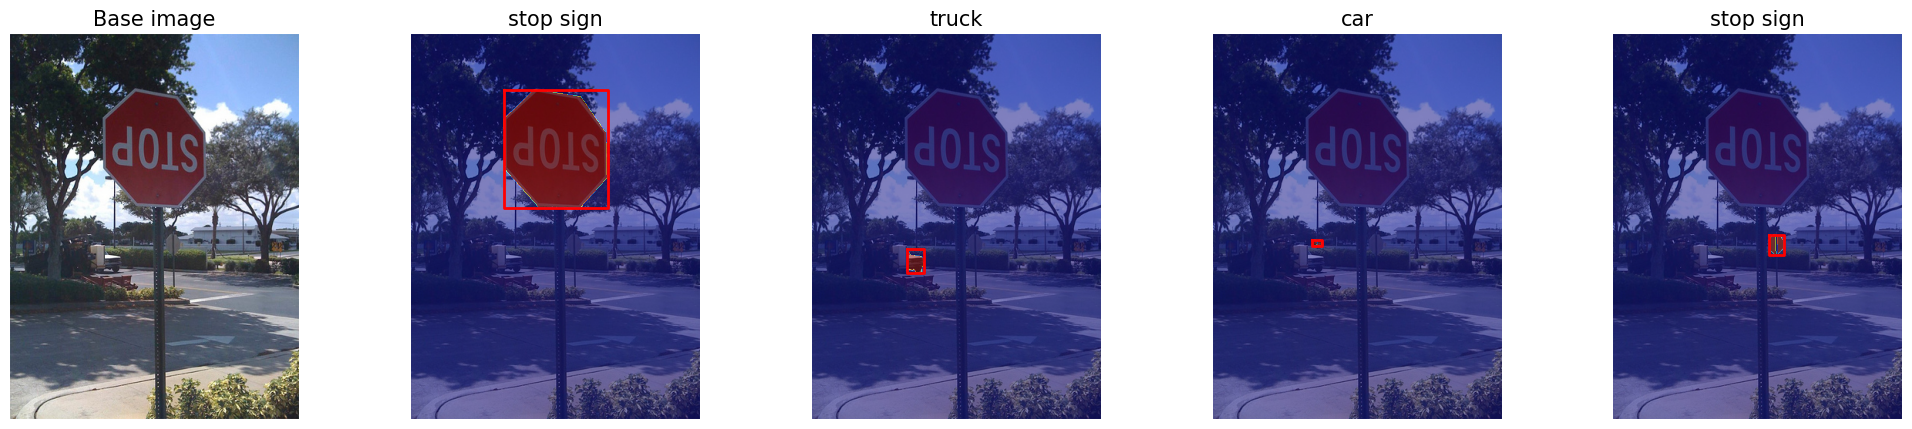

In [ ]:
to_show = 2
offset = 2

scale = 5
linewidth = 2

items = data_train.get_amount(to_show, offset)

for item in items:
    utils.grid_masks_boxes(
        item["image"],
        item["annotations"]["masks"],
        item["annotations"]["boxes"],
        # Use the API to translate the category IDs to names
        titles=data_train.translate_catIDs(item["annotations"]["categories"]),
        scale=scale,
        linewidth=2,
    )

(3, 267, 404, 475)
(183, 137, 244, 229)
(456, 192, 465, 228)
(453, 253, 461, 287)
(445, 298, 450, 337)
(506, 191, 518, 228)
(488, 199, 495, 227)
(245, 230, 350, 318)
(347, 212, 430, 355)
(461, 192, 490, 228)
(527, 249, 551, 289)
(519, 193, 523, 228)
(497, 55, 501, 83)
(524, 97, 527, 135)
(493, 156, 526, 162)
(455, 245, 503, 257)
(462, 254, 470, 287)
(416, 43, 569, 346)
[[  3 267 404 475]
 [183 137 244 229]
 [456 192 465 228]
 [453 253 461 287]
 [445 298 450 337]
 [506 191 518 228]
 [488 199 495 227]
 [245 230 350 318]
 [347 212 430 355]
 [461 192 490 228]
 [527 249 551 289]
 [519 193 523 228]
 [497  55 501  83]
 [524  97 527 135]
 [493 156 526 162]
 [455 245 503 257]
 [462 254 470 287]
 [416  43 569 346]]
(120, 72, 255, 225)
(123, 279, 145, 310)
(128, 267, 141, 275)
(202, 260, 221, 286)
[[120  72 255 225]
 [123 279 145 310]
 [128 267 141 275]
 [202 260 221 286]]


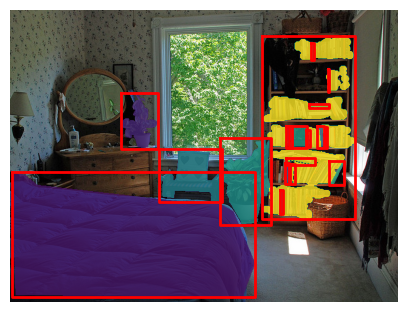

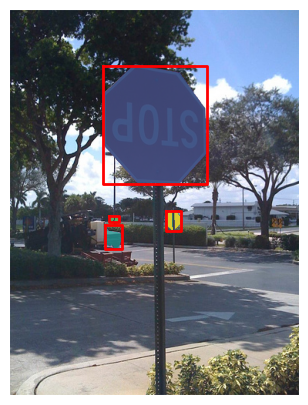

In [ ]:
images_to_show = 2
offset = 2

scale = 5
linewidth = 2

items = data_train.get_amount(to_show, offset)
for item in items:
    utils.print_masks_boxes(
        item["image"],
        item["annotations"]["masks"],
        item["annotations"]["boxes"],
        linewidth=linewidth,
        scale=scale,
        opacity=0.8,
        mask_background=False,
    )

### Testing crop function

(193, 225, 268, 258)
(125, 125, 264, 142)
(0, 130, 105, 145)
(23, 213, 77, 283)
(502, 78, 640, 421)
(402, 205, 468, 293)
(0, 209, 25, 290)
(529, 181, 559, 199)
(22, 231, 44, 283)
(492, 198, 596, 425)
(292, 86, 413, 143)
[[193 225 268 258]
 [125 125 264 142]
 [  0 130 105 145]
 [ 23 213  77 283]
 [502  78 640 421]
 [402 205 468 293]
 [  0 209  25 290]
 [529 181 559 199]
 [ 22 231  44 283]
 [492 198 596 425]
 [292  86 413 143]]


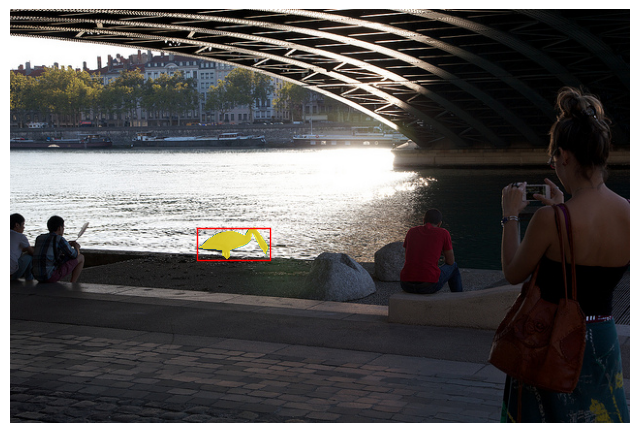

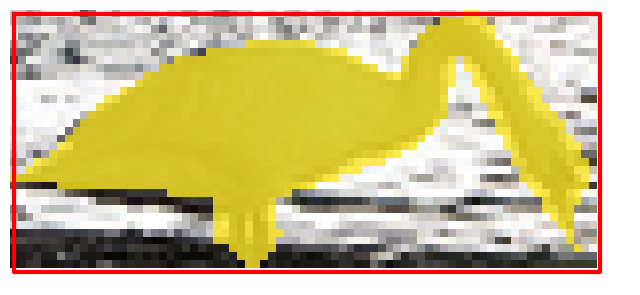

In [ ]:
# all crops work? on PIL Image and numpy array
idx_image = 10
idx_mask = 0
test_item = data_train[idx_image]
image = test_item["image"]
mask = test_item["annotations"]["masks"][idx_mask]
box = test_item["annotations"]["boxes"][idx_mask]

utils.print_masks_boxes(image, [mask], [box], linewidth=1, scale=8)

cropped_img, cropped_mask, cropped_box = utils.crop_xyxy(
    image, mask, box, crop_box=box  # use the gt bbox as crop box, can be any
)
utils.print_masks_boxes(cropped_img, [cropped_mask], [cropped_box])
